# Regresión Logística

La regresión logística es otro de los primeros ejemplos y modelos a revisar al momento de introducirse en el uso del aprendizaje automático y la ciencia de datos. Otra formas simples y sencillas tanto para hacer un modelo formal sobre un conjunto de datos para su análisis y pronóstico.

Declaración de bibliotecas a usar y su propósito.

In [52]:
# Para manejo del protocolo HTTP y la descarga del archivo de datos. En caso de que el archivo ya no pudiera estar disponible en el 
# futuro, una copia de éste se ha hecho en el directorio Archive.
from io import StringIO
import requests

# Biblioteca de modelos de machine learning y medidas.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Procesamiento de datos en data frames y procesamiento numérico.
import pandas as pd
import numpy as np

# Bibliotecas de visualización.
import matplotlib.pyplot as plt
import seaborn as sns

Para facilitar la visualización de gráficos de **Matplotlib** y su actualización en línea

In [3]:
%matplotlib inline

El conjunto de datos del Titanic es muy famoso y contiene las características de los pasajeros del Titanic. A menudo se utiliza como conjunto de datos introductorio para problemas de regresión logística. En este tutorial, utilizaremos el conjunto de datos del Titanic combinado con un modelo de regresión logística de Python para predecir si un pasajero sobrevivió o no al accidente del Titanic.

El [conjunto de datos original del Titanic](https://www.kaggle.com/c/titanic) está disponible públicamente en **Kaggle.com**, un sitio _web_ que alberga conjuntos de datos y concursos de ciencia de datos. Para facilitarle las cosas al estudiante en este curso, utilizaremos una versión semi limpia del conjunto de datos del Titanic, lo que le ahorrará tiempo en la limpieza y manipulación de datos.

In [4]:
# URL del archivo a ser descargado
url = 'https://www.nickmccullum.com/logistic-regression/titanic_train.csv'

# Se crea un objeto que permita interactuar con el protocolo HTTP.
response = requests.get(url)

Se valida si el archivo puede ser descargado. Para este caso, la forma como el servidor web responde sobre el archivo de la petición genera una respuesta de direccionamiento (en un browser se abrirá una ventana de dialógo para seleccionar un directoprio donde guardar al archivo), de aquí que se recurra al uso de la biblioteca `io` para obtner el conteniod del archivo de un _stream_ de octetos que puedan ser leídos como los datos de un archivo.

In [12]:
if response.status_code == 200:
    data = StringIO(response.text)
    df = pd.read_csv(data)
else:
    print(f"Failed to fetch data: status code {response.status_code}")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Estos son los nombres de las columnas del _data frame_. Aquí hay breves explicaciones de cada punto de datos:

+ `PassengerId`: un identificador numérico para cada pasajero del Titanic.
+ `Survived`: un identificador binario que indica si el pasajero sobrevivió al accidente del Titanic. Esta variable tendrá un valor de 1 si sobrevivieron y 0 si no lo hicieron.
+ `Pclass`: la clase del boleto del pasajero en cuestión. Puede tener un valor de 1, 2 o 3, según la ubicación del pasajero en el barco.
+ `Name`: nombre del pasajero.
+ `Sex`: `male` o `female`.
+ `Age`: la edad (en años) del pasajero.
+ `SibSp`: número de hermanos y cónyuges a bordo del barco.
+ `Parch`: el número de padres e hijos a bordo del barco.
+ `Ticket`: número de boleto del pasajero.
+ `Fare`: ¿cuánto pagaron los pasajeros por su boleto en el Titanic?
+ `Cabin`: número de cabina o camarote del pasajero.
+ `Embarked`: el puerto donde embarcó el pasajero (C = Cherbourg, Q = Queenstown, S = Southampton)

A continuación, aprenderemos más sobre nuestro conjunto de datos utilizando algunas técnicas básicas de análisis de datos exploratorios.

Cuando se utilizan técnicas de aprendizaje automático para modelar problemas de clasificación, siempre es una buena idea comprender la relación entre categorías. Para este problema específico, es útil ver cuántos supervivientes y no supervivientes existen en nuestros datos de entrenamiento.

In [37]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: xlabel='Survived', ylabel='count'>

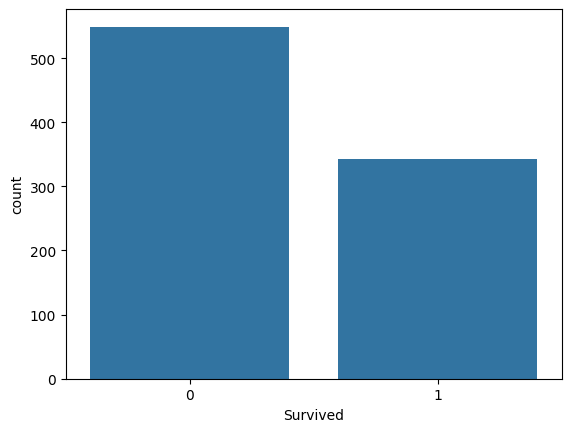

In [14]:
sns.countplot(x='Survived', data=df)

<Axes: xlabel='Survived', ylabel='count'>

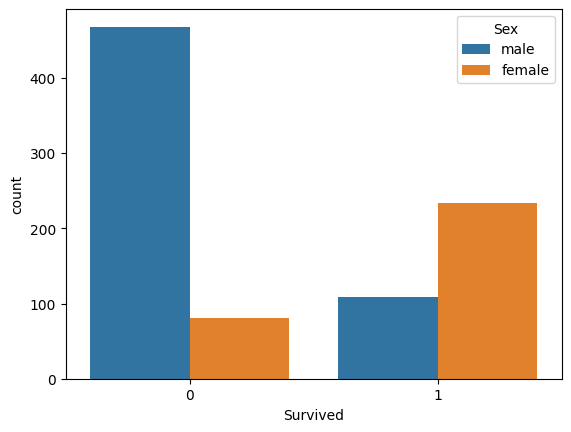

In [15]:
sns.countplot(x='Survived', hue='Sex', data=df)

<Axes: xlabel='Survived', ylabel='count'>

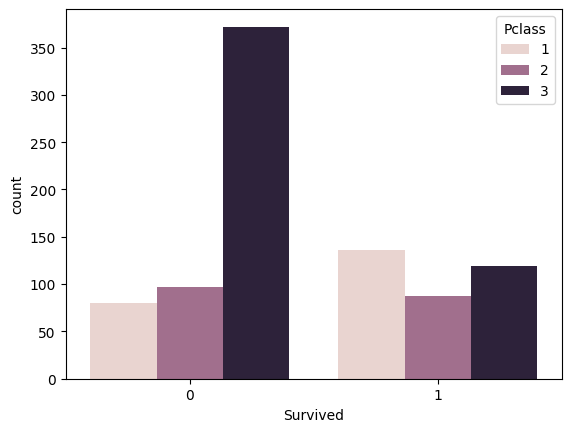

In [16]:
sns.countplot(x='Survived', hue='Pclass', data=df)

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

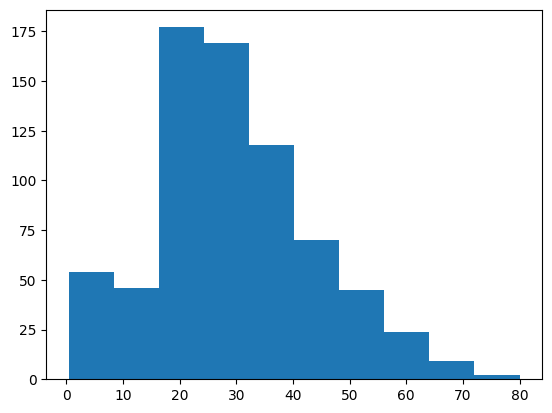

In [17]:
plt.hist(df['Age'].dropna())

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

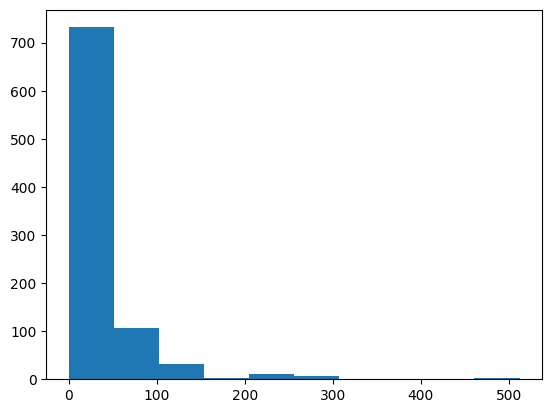

In [19]:
plt.hist(df['Fare'])

In [21]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

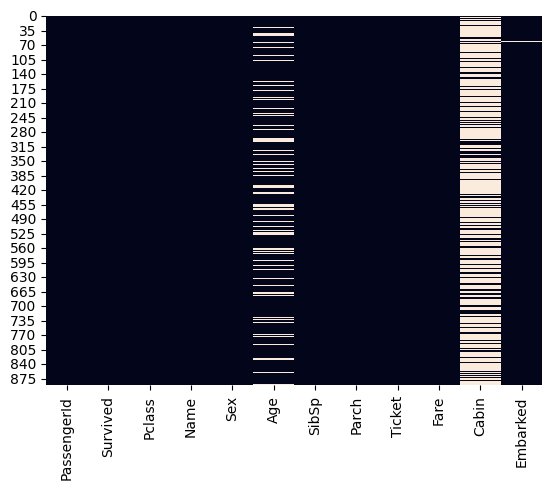

In [22]:
sns.heatmap(df.isnull(), cbar=False)

En esta visualización, las líneas blancas indican valores faltantes en el conjunto de datos. Puede ver que las columnas `Age` y `Cabin` contienen la mayoría de los datos que faltan en el conjunto de datos del Titanic. La columna `Age`, en particular, contiene una cantidad suficientemente pequeña de datos faltantes que podemos completar. Por otro lado, a los datos de la cabina les faltan suficientes datos como para que probablemente podamos eliminarlos por completo de nuestro modelo.

Completar los datos faltantes con datos promedio del resto del conjunto de datos se denomina "imputación". Ahora usaremos la imputación para completar los datos que faltan en la columna edad.

La forma más básica de imputación sería completar los datos de `Age` que faltan con el valor de edad promedio en todo el conjunto de datos. Sin embargo, existen mejores métodos.

Completaremos los valores de edad que faltan con el valor de edad promedio para la clase de pasajero `Pclass` específica a la que pertenece el pasajero. Para entender por qué esto es útil, considere el siguiente diagrama de caja:

<Axes: xlabel='Pclass', ylabel='Age'>

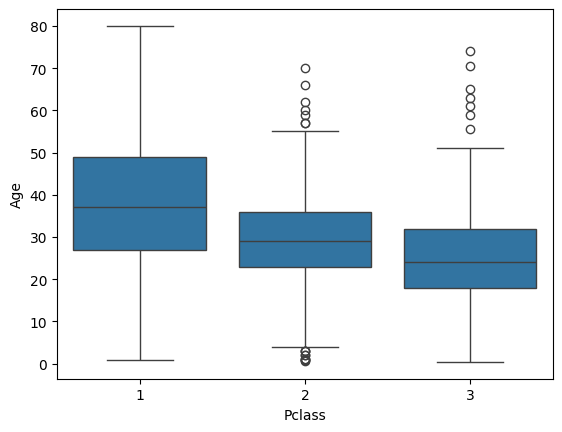

In [27]:
sns.boxplot(x=df['Pclass'], y=df['Age'])

Como se puede ver, los pasajeros con un valor `Pclass` de 1 (la clase de pasajero más cara) tienden a ser los de mayor edad, mientras que los pasajeros con un valor `Pclass` de 3 (la más barata) tienden a ser los más jóvenes. Esto es muy lógico, por lo que usaremos el valor de edad promedio dentro de diferentes datos de `Pclass` para imputar los datos faltantes en nuestra columna `Age`.

La forma más sencilla de realizar una imputación en un conjunto de datos como el conjunto de datos del Titanic es mediante la creación de una función personalizada. Para empezar, debemos determinar el valor medio de edad para cada valor de `Pclass`.

In [33]:
def impute_missing_age(columns):
    age = columns.iloc[0]
    passenger_class = columns.iloc[1]
    if pd.isnull(age):
        if(passenger_class == 1):
            return df[df['Pclass'] == 1]['Age'].mean()
        elif(passenger_class == 2):
            return df[df['Pclass'] == 2]['Age'].mean()
        elif(passenger_class == 3):
            return df[df['Pclass'] == 3]['Age'].mean()
    else:
        return age

In [34]:
df['Age'] = df[['Age', 'Pclass']].apply(impute_missing_age, axis = 1)

Ahora que hemos realizado la imputación en cada fila para abordar los datos de edad faltantes, investiguemos nuestro diagrama de caja original.

<Axes: >

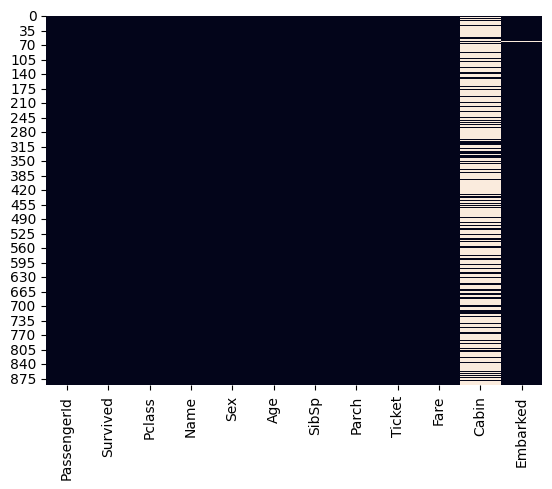

In [35]:
sns.heatmap(df.isnull(), cbar=False)

¿Por qué dedicamos tanto tiempo específicamente a lidiar con los datos faltantes en la columna `Age` Dado el impacto de la edad en la supervivencia en la mayoría de los desastres y enfermedades, es una variable que probablemente tenga un alto valor predictivo dentro de nuestro conjunto de datos.

In [36]:
df.drop('Cabin', axis=1, inplace = True)

La siguiente tarea que debemos abordar son las características categóricas. Es decir, necesitamos encontrar una manera de trabajar con observaciones que no sean numéricas naturalmente. Un buen ejemplo es la columna `Sex`, que tiene dos valores: `male` y `female`. De manera similar, la columna `Embarked` contiene una sola letra que indica de qué ciudad partió el pasajero. Para resolver este problema, crearemos variables ficticias. Estos asignan un valor numérico a cada categoría de una característica no numérica. **Pandas** tienen un método integrado llamado `get_dummies()` que facilita la creación de variables ficticias. El método `get_dummies` tiene un problema: creará una nueva columna para cada valor en la columna del _data frame_.

In [38]:
pd.get_dummies(df['Sex'])

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [42]:
pd.get_dummies(df['Embarked'])

,C,Q,S
0,False,False,True
1,True,False,False
2,False,False,True
3,False,False,True
4,False,False,True
...,...,...,...
886,False,False,True
887,False,False,True
888,False,False,True
889,True,False,False


Hay dos cosas importante a tener en cuenta. Para todos estos casos se tienen columnas por cada uno de los valores que la columna original puede adquirir. La presencia de todas estas provoca que un valor pueda ser inferido por los valores de las restante, lo cual no es del todo deseable pues nos lleva a la  multicolinealidad. Para evitar que algunos valores puedan ser inferidos por la presencia o ausencia de otros una práctica común es eliminar una delas columnas y así favorecer la independencia de éstas.

La otra es el tipo de datos, que si bien Python no tiene problemas para trabajar en forma numérica los valores booleanos, conviene ser explícitos en el tipo de datos numérico. 

In [40]:
pd.get_dummies(df['Sex'],dtype=int)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [41]:
pd.get_dummies(df['Sex'],dtype=int,drop_first=True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [44]:
sex_data = pd.get_dummies(df['Sex'],dtype=int,drop_first=True)
embarked_data = pd.get_dummies(df['Embarked'],dtype=int,drop_first=True)

In [47]:
df = pd.concat([df, sex_data, embarked_data], axis = 1)

In [48]:
df.drop(['Name', 'Ticket', 'Sex', 'Embarked'], axis = 1, inplace = True)

In [50]:
y_data = df['Survived']
x_data = df.drop('Survived', axis = 1)

In [51]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)

In [53]:
model = LogisticRegression()

In [56]:
model.fit(x_training_data, y_training_data)

/Users/lalo/Applications/MiniConda3/envs/colab/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_training_data)
x_scaled = scaler.transform(x_training_data)

In [60]:
model.fit(x_scaled, y_training_data)

LogisticRegression()

In [61]:
predictions = model.predict(x_test_data)

/Users/lalo/Applications/MiniConda3/envs/colab/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [62]:
from sklearn.metrics import classification_report

In [65]:
classification_report(y_test_data, predictions)

/Users/lalo/Applications/MiniConda3/envs/colab/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lalo/Applications/MiniConda3/envs/colab/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/lalo/Applications/MiniConda3/envs/colab/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

'              precision    recall  f1-score   support\n\n           0       0.62      1.00      0.76       166\n           1       0.00      0.00      0.00       102\n\n    accuracy                           0.62       268\n   macro avg       0.31      0.50      0.38       268\nweighted avg       0.38      0.62      0.47       268\n'

In [64]:
classification_report(y_test_data, predictions, zero_division=1.0)

'              precision    recall  f1-score   support\n\n           0       0.62      1.00      0.76       166\n           1       1.00      0.00      0.00       102\n\n    accuracy                           0.62       268\n   macro avg       0.81      0.50      0.38       268\nweighted avg       0.76      0.62      0.47       268\n'

In [66]:
classification_report(y_test_data, predictions, output_dict=True, zero_division=1.0)

{'0': {'precision': 0.6194029850746269,
  'recall': 1.0,
  'f1-score': 0.7649769585253456,
  'support': 166.0},
 '1': {'precision': 1.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 102.0},
 'accuracy': 0.6194029850746269,
 'macro avg': {'precision': 0.8097014925373134,
  'recall': 0.5,
  'f1-score': 0.3824884792626728,
  'support': 268.0},
 'weighted avg': {'precision': 0.7642570728447317,
  'recall': 0.6194029850746269,
  'f1-score': 0.4738290116239081,
  'support': 268.0}}

In [67]:
print(classification_report(y_test_data, predictions, zero_division=1.0))

              precision    recall  f1-score   support

           0       0.62      1.00      0.76       166
           1       1.00      0.00      0.00       102

    accuracy                           0.62       268
   macro avg       0.81      0.50      0.38       268
weighted avg       0.76      0.62      0.47       268



# Referencias

1. "_Boxplot in Seaborn_", **python-charts.com**,_web_. Visited: 2024.02.21. URL: [https://python-charts.com/distribution/box-plot-seaborn/](https://python-charts.com/distribution/box-plot-seaborn/)
2. "_6.3.1. Standardization, or mean removal and variance scaling_" in "_6.3. Preprocessing data_", **scikit-learn.org**, _web_. Visited: 2024.02.21. URL: [https://scikit-learn.org/stable/modules/preprocessing.html](https://scikit-learn.org/stable/modules/preprocessing.html)
3. "_\_classification.py_", **github.com**, repository _**scikit-learn/scikit-learn**_, code, Visited: 2024.02.21. URL: [https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/metrics/_classification.py](https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/metrics/_classification.py)